# Import and explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
job_df = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
job_df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [3]:
job_df.shape

(17880, 18)

In [4]:
# Dropping the unnecesary id column
job_df.drop('job_id',axis=1,inplace=True)

In [5]:
job_df.isna().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
job_df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [7]:
# replacing the numm with a atring value which can be used as a value
job_df=job_df.replace(np.nan,'nav')

In [8]:
job_df.isna().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Plotting the features

In [9]:
columns=['telecommuting',
'has_company_logo'       
,'has_questions'          
,'employment_type'        
,'required_experience'    
,'required_education'                    
,'function']

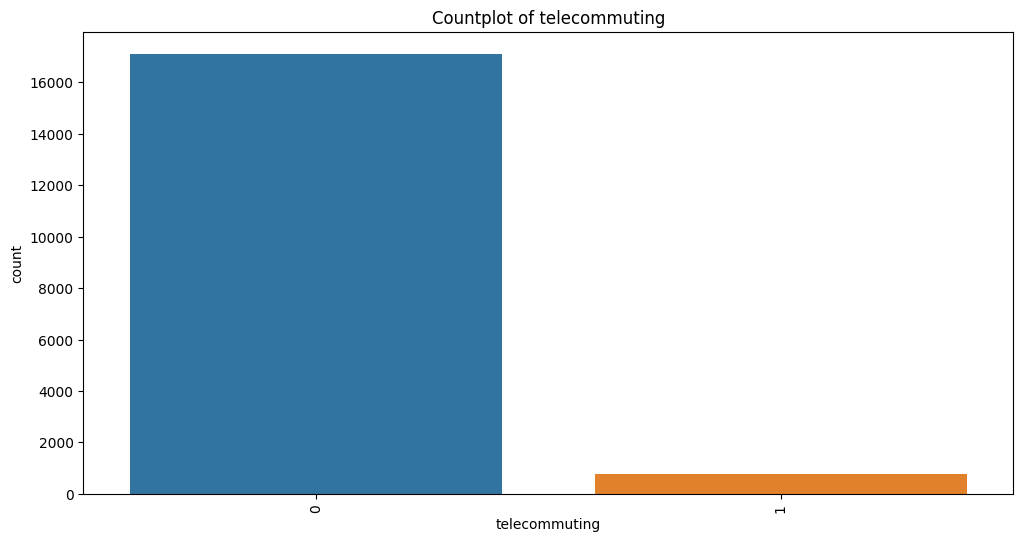

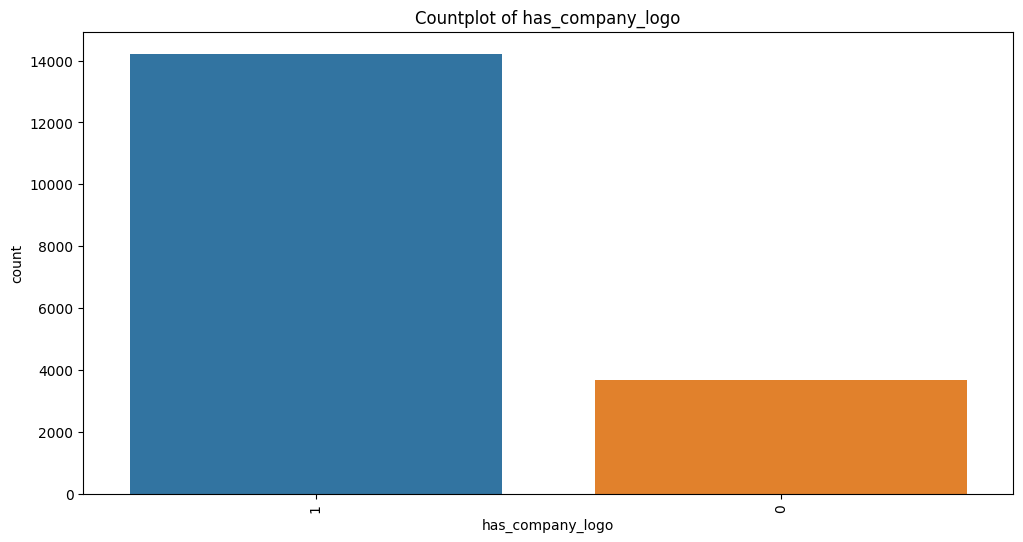

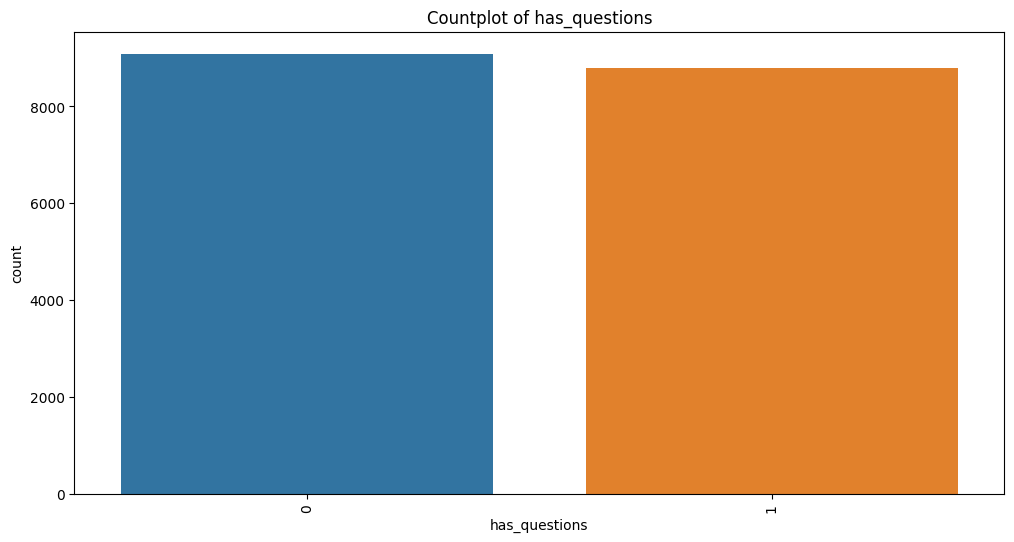

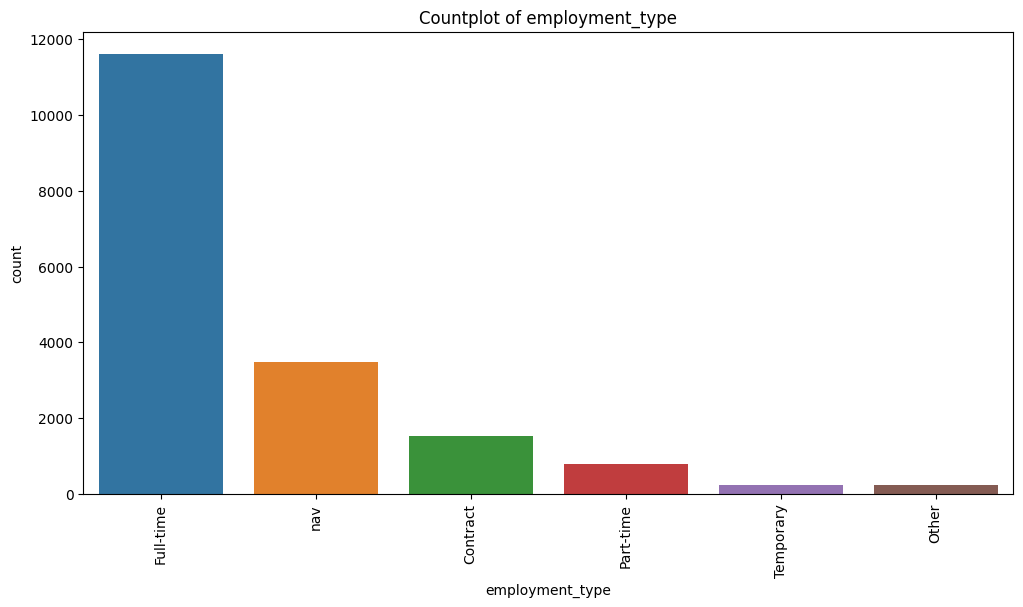

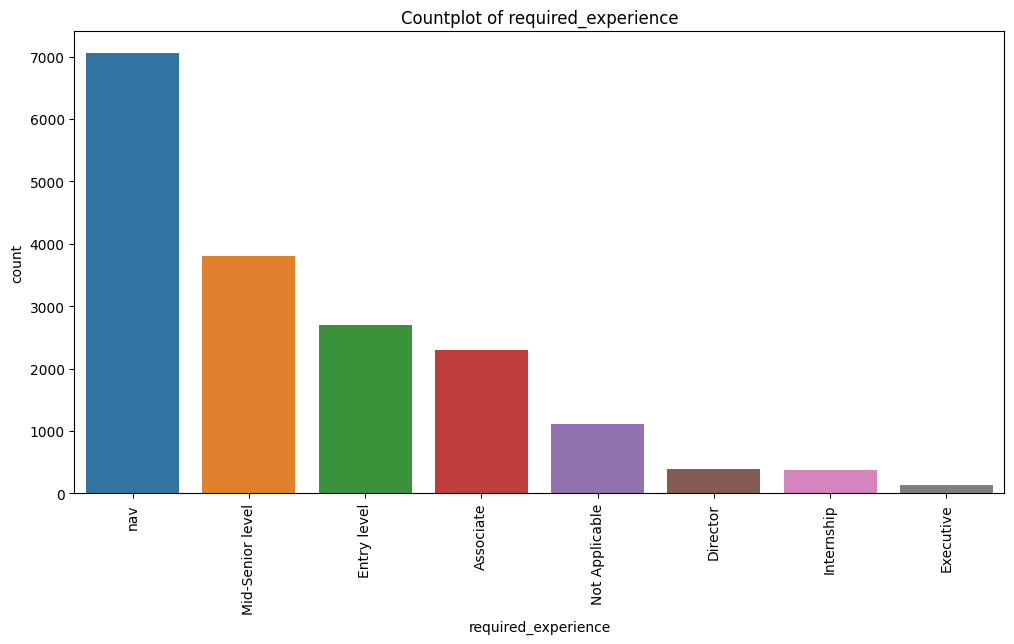

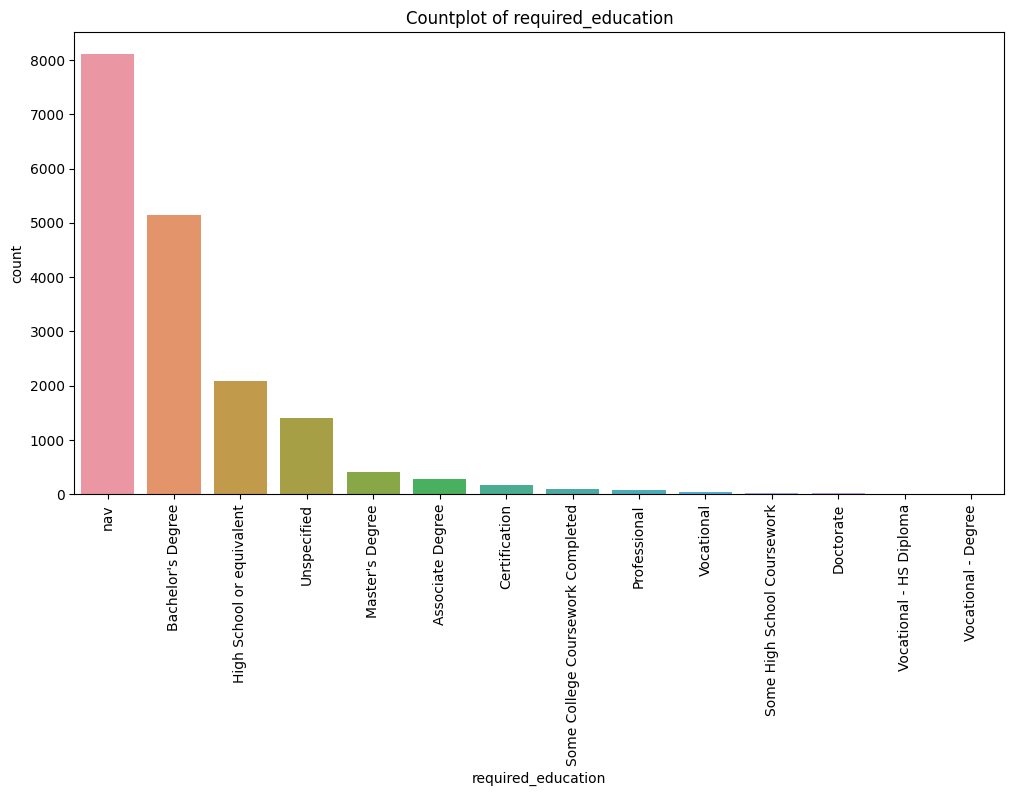

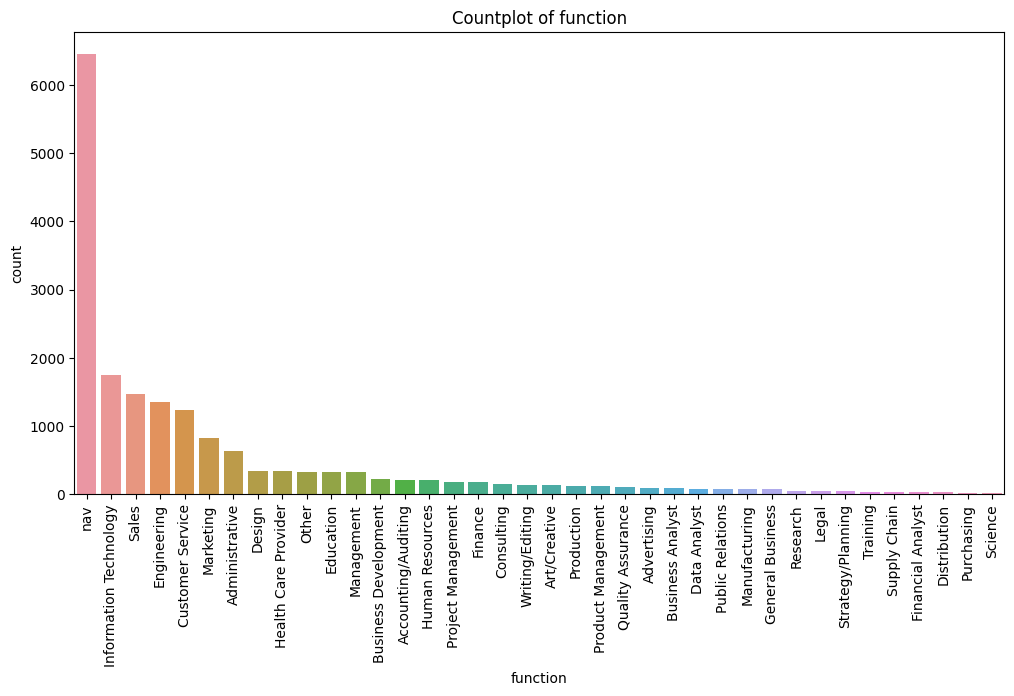

In [10]:
for column in columns:
    plt.figure(figsize=(12,6)) 
    sns.countplot(data=job_df, x=column, order=job_df[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {column}')
    plt.show()

# Get correlation among all categorical type column and target column

In [11]:
job_df.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [12]:
# selecting the columns which has limited number of unique value
corr_columns=[]

for column in job_df.columns:
    if job_df[column].nunique() < 150:
        corr_columns.append(column)

In [13]:
corr_columns

['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [14]:
# remove 'fraudulent' column from corr_columns as it's a target column
corr_columns.remove('fraudulent')
corr_columns

['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

In [15]:
# Calculate theil's U value
from collections import Counter

def entropy(series):
    probs= pd.Series(Counter(series)).astype('float') / len(series)
    return -np.sum(probs * np.log2(probs+0.0000001))

def conditional_entropy(x,y):
    res=0.0
    y_ser= pd.Series(y)
    uni_y=y_ser.unique()

    for value in uni_y:
        subset= x[y_ser==value]
        weight= len(subset)/ len(x)
        res += weight * entropy(subset)

    return res


def uncertainty_coef(x,y):
    x=pd.Series(x)
    y=pd.Series(y)
    e_x= entropy(x)

    if e_x == 0.0:
        return 1.0

    e_x_given_y = conditional_entropy(x,y)
    u= (e_x- e_x_given_y)/ e_x
    return u

In [16]:
for column in corr_columns:
    print(f'Column :{column}')
    u= uncertainty_coef(job_df[column],job_df['fraudulent'])
    print(u)

Column :telecommuting
0.00281896250202101
Column :has_company_logo
0.052194088319505665
Column :has_questions
0.006256165841864404
Column :employment_type
0.0025253184623842883
Column :required_experience
0.0024368554602527278
Column :required_education
0.0055938272504483634
Column :industry
0.00984379145227018
Column :function
0.005564543741885424


#### Now dropping the columns based on theil's U value and relevence

In [17]:
# remove corr_columns as they doesn't seems to have any effact on fraudulent
job_df=job_df.drop(corr_columns,axis=1)
job_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,nav,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nav,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,nav,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",nav,nav,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nav,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,nav,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,"US, FL, Fort Worth",nav,nav,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [18]:
# Also drop these columns as they are hard to work with
job_df.drop(['department','salary_range'],axis=1,inplace=True)
job_df.head()

,title,location,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nav,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nav,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [19]:
# check unique valuess quantity 
for column in ['title','location','benefits']:
        print(f'for {column} number of unique value :{job_df[column].nunique()}')

for title number of unique value :11231
for location number of unique value :3106
for benefits number of unique value :6205


## checking the correlation between 'location' and the 'fraudulent' column

In [20]:
uncertainty_coef(job_df['location'],job_df['fraudulent'])

0.016674991701498332

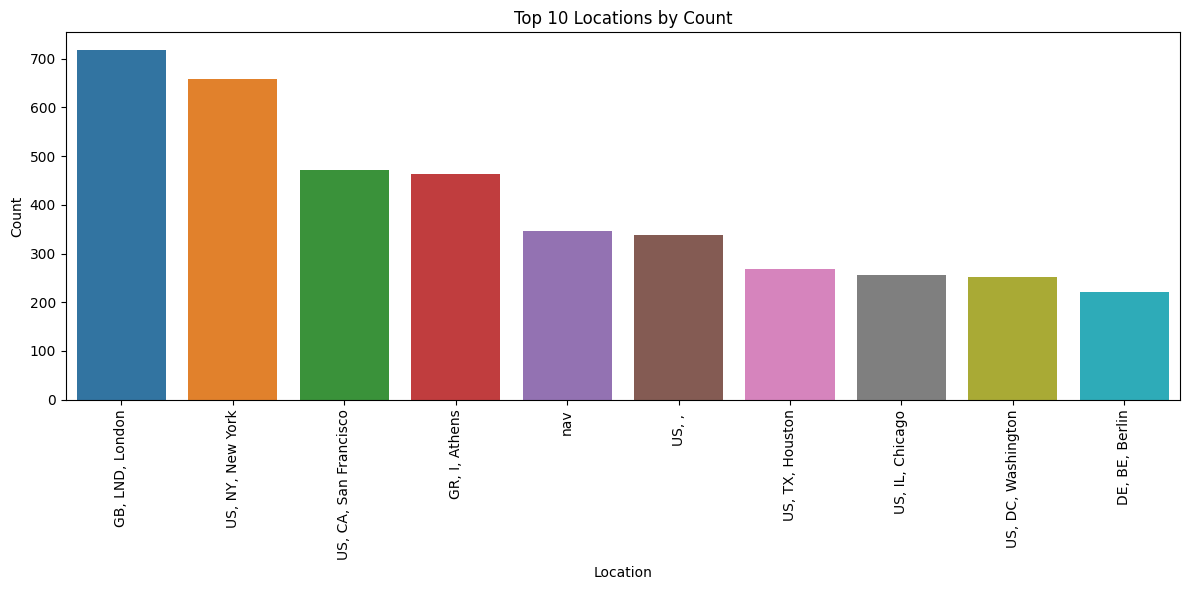

In [21]:
top_10_locations = job_df['location'].value_counts().head(10).index

filtered_df = job_df[job_df['location'].isin(top_10_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='location', order=top_10_locations)
plt.xticks(rotation=90)
plt.title('Top 10 Locations by Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
ben_df=job_df[job_df['benefits']=='nav']
ben_df['fraudulent'].value_counts()

fraudulent
0    6848
1     364
Name: count, dtype: int64

In [23]:
job_df['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object

In [24]:
# from 'location' column made it into two different column : 'country' , 'city'
# then drop the 'location' column
# Note : Some 'location' column doesn't have city , so replacing empty space with 'nav' value

split_location= job_df['location'].str.split(',', expand=True)

job_df['country']= split_location[0].str.strip()
job_df['city']= split_location[2].str.strip()

job_df['country'] = job_df['country'].replace('nav', 'nav')
job_df['city'] = job_df['city'].replace('', 'nav')

job_df.drop('location',axis=1, inplace=True)

job_df.head(10)

,title,company_profile,description,requirements,benefits,fraudulent,country,city
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nav,0,US,New York
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,NZ,Auckland
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nav,0,US,Wever
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,US,Washington
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,US,Fort Worth
5,Accounting Clerk,nav,Job OverviewApex is an environmental consultin...,nav,nav,0,US,nav
6,Head of Content (m/f),"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,DE,Berlin
7,Lead Guest Service Specialist,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,US,San Francisco
8,HP BSM SME,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,nav,0,US,Pensacola
9,Customer Service Associate - Part Time,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,nav,0,US,Phoenix


In [25]:
job_df.shape

(17880, 8)

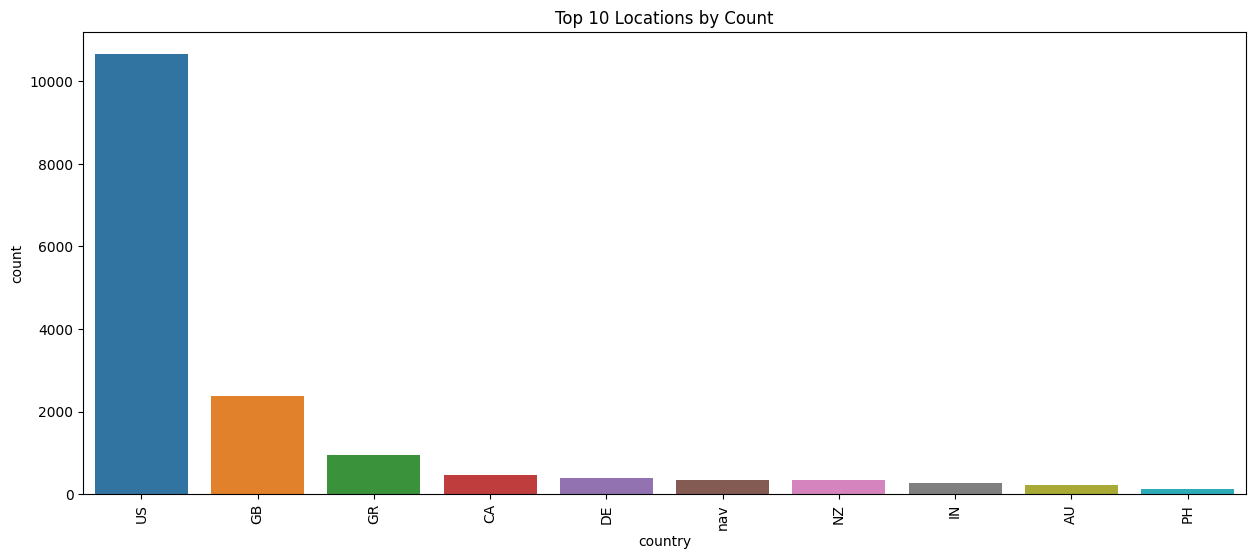

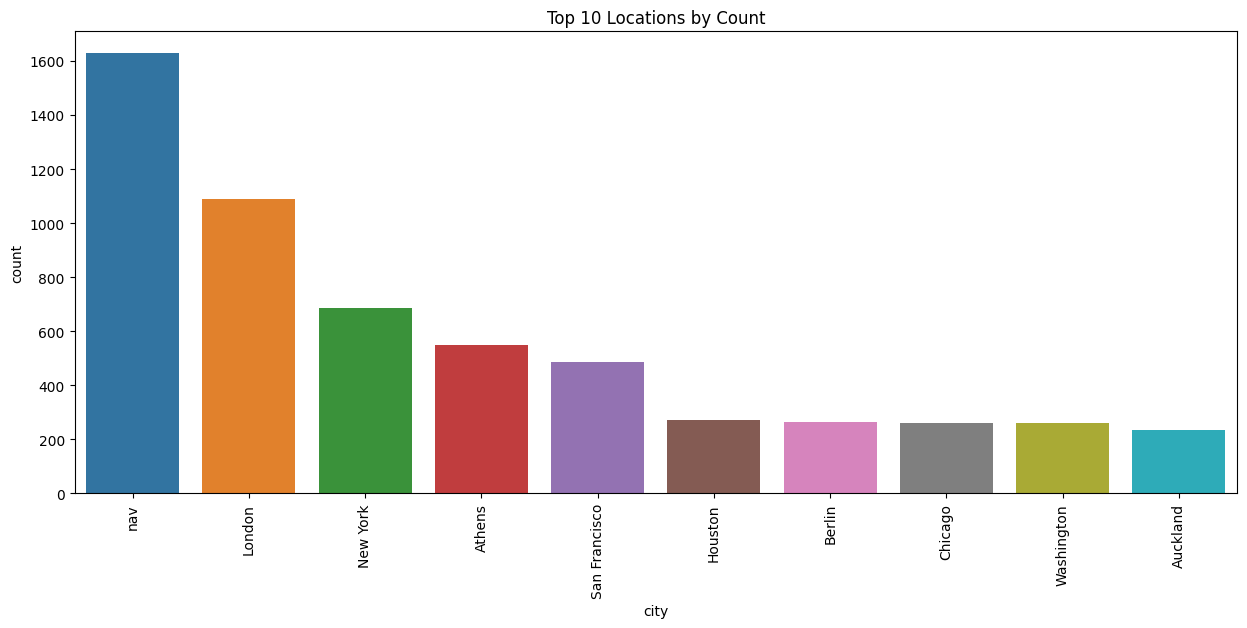

In [26]:
for column in ['country','city']:
    top_10_locations = job_df[column].value_counts().head(10).index
    
    filtered_df = job_df[job_df[column].isin(top_10_locations)]
    
    plt.figure(figsize=(15, 6))
    sns.countplot(data=filtered_df, x=column, order=top_10_locations)
    plt.xticks(rotation=90)
    plt.title('Top 10 Locations by Count')
    plt.show()

In [27]:
job_df['city'].value_counts()

city
nav                           1628
London                        1089
New York                       685
Athens                         548
San Francisco                  486
                              ... 
Allendale Charter Township       1
New York City Metro area         1
77619                            1
Sherman Oaks                     1
EC4M 7AN                         1
Name: count, Length: 2202, dtype: int64

In [28]:
job_df['country'].value_counts()

country
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
CO        1
MA        1
JM        1
KZ        1
KH        1
Name: count, Length: 91, dtype: int64

In [29]:
job_df.columns

Index(['title', 'company_profile', 'description', 'requirements', 'benefits',
       'fraudulent', 'country', 'city'],
      dtype='object')

In [30]:
# checking the null values('nav')
for column in job_df.columns:
    print(f"Value counts for column: {column}")
    if 'nav' in job_df[column].astype(str).values:
        nan_count = (job_df[column] == 'nav').sum()
        print(f"Including 'nan' string: 'nav' appears {nan_count} times")
    print("-" * 50)

Value counts for column: title
--------------------------------------------------
Value counts for column: company_profile
Including 'nan' string: 'nav' appears 3308 times
--------------------------------------------------
Value counts for column: description
Including 'nan' string: 'nav' appears 1 times
--------------------------------------------------
Value counts for column: requirements
Including 'nan' string: 'nav' appears 2696 times
--------------------------------------------------
Value counts for column: benefits
Including 'nan' string: 'nav' appears 7212 times
--------------------------------------------------
Value counts for column: fraudulent
--------------------------------------------------
Value counts for column: country
Including 'nan' string: 'nav' appears 346 times
--------------------------------------------------
Value counts for column: city
Including 'nan' string: 'nav' appears 1628 times
--------------------------------------------------


## Make a new column 

In [31]:
# combining all the columns to make a single column
job_df['text'] = job_df['country']+ ' '+job_df['city']+' '+ job_df['title']+' '+ job_df['company_profile']+ ' '+ job_df['description']+' '+job_df['requirements']

In [32]:
job_df.head()

,title,company_profile,description,requirements,benefits,fraudulent,country,city,text
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nav,0,US,New York,"US New York Marketing Intern We're Food52, and..."
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,NZ,Auckland,NZ Auckland Customer Service - Cloud Video Pro...
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nav,0,US,Wever,US Wever Commissioning Machinery Assistant (CM...
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,US,Washington,US Washington Account Executive - Washington D...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,US,Fort Worth,US Fort Worth Bill Review Manager SpotSource S...


In [33]:
df=job_df[['text','fraudulent']]
df.head()

,text,fraudulent
0,"US New York Marketing Intern We're Food52, and...",0
1,NZ Auckland Customer Service - Cloud Video Pro...,0
2,US Wever Commissioning Machinery Assistant (CM...,0
3,US Washington Account Executive - Washington D...,0
4,US Fort Worth Bill Review Manager SpotSource S...,0


## Encode the 'text' column

In [34]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

2025-06-25 06:13:50.170873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750832030.377948      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750832030.437092      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
tokenizer= DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model= DistilBertModel.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [36]:
# function for embedding
def make_embeddings(texts):
    embeddings=[]

    for text in texts:
        inputs= tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)

        with torch.no_grad():
            outputs= model(**inputs)

        cls_embeddings= outputs.last_hidden_state[:,0,:].squeeze().numpy()
        embeddings.append(cls_embeddings)
    return embeddings

In [37]:
# dropping any null value (good practice)
df.dropna(inplace=True)

/tmp/ipykernel_35/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [38]:
# now making the embedding and later make this into a column 
embedding= make_embeddings(df['text'])

In [39]:
df['embeddings']=embedding
df.head()

/tmp/ipykernel_35/770159880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings']=embedding


,text,fraudulent,embeddings
0,"US New York Marketing Intern We're Food52, and...",0,"[0.051422294, -0.08973104, -0.2782968, -0.0888..."
1,NZ Auckland Customer Service - Cloud Video Pro...,0,"[0.070238456, -0.18529367, -0.11897845, -0.135..."
2,US Wever Commissioning Machinery Assistant (CM...,0,"[-0.2596964, -0.04247156, -0.11883403, -0.0084..."
3,US Washington Account Executive - Washington D...,0,"[-0.20762512, 0.019805847, -0.022006245, 0.109..."
4,US Fort Worth Bill Review Manager SpotSource S...,0,"[-0.38809034, -0.0769987, -0.19998935, 0.00506..."


In [40]:
# saving the dataframe for further needed
df.to_csv('embedded dataframe.csv', index=False)

# Splitting the Dataset into train and test set

In [41]:
X=df['embeddings']
y=df['fraudulent']

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [43]:
X_train.shape , X_test.shape

((12208,), (5232,))

In [44]:
X

0        [0.051422294, -0.08973104, -0.2782968, -0.0888...
1        [0.070238456, -0.18529367, -0.11897845, -0.135...
2        [-0.2596964, -0.04247156, -0.11883403, -0.0084...
3        [-0.20762512, 0.019805847, -0.022006245, 0.109...
4        [-0.38809034, -0.0769987, -0.19998935, 0.00506...
                               ...                        
17875    [0.2500759, -0.11268968, -0.0703044, 0.0518125...
17876    [-0.2008383, -0.20220622, -0.016074292, 0.1214...
17877    [-0.24847533, 0.13043563, 0.014881696, 0.07337...
17878    [0.1645177, 0.044888142, 0.0080053825, -0.0757...
17879    [0.240253, -0.12558901, -0.0001477702, 0.02908...
Name: embeddings, Length: 17440, dtype: object

In [45]:
X_train = np.vstack(X_train) # making it suitable fior fitting

In [52]:
# focal loss : a loss funtion for suitable for this imbalanced task

import tensorflow as tf

def binary_focal_loss(gamma=2., alpha=0.25):
    def focal_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        bce_exp = tf.exp(-bce)
        focal_loss = alpha * tf.pow((1 - bce_exp), gamma) * bce
        return focal_loss
    return focal_loss

# Model and training

In [66]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

model = Sequential([
    Dense(256, activation='relu', input_shape=(768,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=binary_focal_loss(gamma=2.0, alpha=0.15),
              metrics=['accuracy',Recall()])

model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9372 - loss: 0.0088 - recall_1: 0.0227 - val_accuracy: 0.9509 - val_loss: 0.0054 - val_recall_1: 0.0000e+00
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9509 - loss: 0.0063 - recall_1: 0.0105 - val_accuracy: 0.9509 - val_loss: 0.0050 - val_recall_1: 0.0000e+00
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9537 - loss: 0.0054 - recall_1: 0.0515 - val_accuracy: 0.9582 - val_loss: 0.0046 - val_recall_1: 0.2333
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.0053 - recall_1: 0.1840 - val_accuracy: 0.9640 - val_loss: 0.0037 - val_recall_1: 0.3333
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.0045 - recall_1: 0.3584 - val_accuracy: 0.9705 - val_loss: 0.0040 - val_recall_1: 0.5167
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.0040 - recall_1: 0.4090 - val_accuracy: 0.9697 - val_loss: 0.0032 - val

In [67]:
X_test

array([[ 0.07138652, -0.09220462, -0.26858243, ..., -0.09272992,
         0.68897736, -0.05823383],
       [-0.34364083, -0.09910764, -0.19141965, ..., -0.08360355,
         0.3768335 , -0.01659088],
       [-0.07910045,  0.04835146,  0.03811663, ..., -0.07004391,
         0.38574934,  0.3091045 ],
       ...,
       [-0.05162643, -0.01103515, -0.11561324, ..., -0.2913518 ,
         0.44309413,  0.07484412],
       [-0.2529109 ,  0.02534205,  0.04822486, ..., -0.21532369,
         0.3303327 ,  0.1540064 ],
       [-0.04129029, -0.02426407,  0.0023654 , ..., -0.20897324,
         0.32560936,  0.22314708]], dtype=float32)

In [68]:
X_test = np.vstack(X_test)

y_pred_probs = model.predict(X_test)  
y_pred = (y_pred_probs > 0.5).astype(int)  

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Evaluation

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4987
           1       0.72      0.81      0.76       245

    accuracy                           0.98      5232
   macro avg       0.85      0.90      0.87      5232
weighted avg       0.98      0.98      0.98      5232



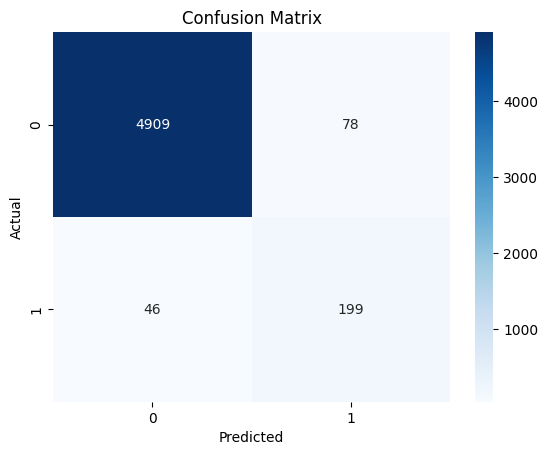

ROC-AUC Score: 0.9760
F1 Score: 0.7625


In [69]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# 1.Classification Report
print('Classification Report :')
print(classification_report(y_test, y_pred))

#2.Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. ROC-AUC score
y_pred_probs = y_pred_probs.reshape(-1) 
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 4. F1 Score 
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
